In [36]:
import mindspore
from mindspore import nn
from mindspore.dataset import MnistDataset, vision, transforms

import numpy as np

In [37]:
test_dataset = MnistDataset('../MNIST_Data/test')

In [38]:

def datapipe(dataset, batch_size):
    image_transforms = [
        vision.Rescale(1.0 / 255.0, 0),
        vision.Normalize(mean=(0.1307,), std=(0.3081,)),
        vision.HWC2CHW()
    ]
    
    label_transform = transforms.TypeCast(mindspore.int32)

    dataset = dataset.map(image_transforms, 'image')
    dataset = dataset.map(label_transform, 'label')
    dataset = dataset.batch(batch_size)
    return dataset

In [39]:
test_dataset = datapipe(test_dataset, 64)

In [40]:
# Define model
class Network(nn.Cell):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.dense_relu_sequential = nn.SequentialCell(
            nn.Dense(28*28, 512),
            nn.ReLU(),
            nn.Dense(512, 512),
            nn.ReLU(),
            nn.Dense(512, 10)
        )

    def construct(self, x):
        x = self.flatten(x)
        logits = self.dense_relu_sequential(x)
        return logits

model = Network()


In [41]:
# Load checkpoint and load parameter to model
param_dict = mindspore.load_checkpoint("../model.ckpt")
param_not_load = mindspore.load_param_into_net(model, param_dict)
print(param_not_load)

[]


In [42]:
model.set_train(False)
for data, label in test_dataset:
    pred = model(data)
    predicted = pred.argmax(1)
    print(f'Predicted: "{predicted[:10]}", Actual: "{label[:10]}"')
    break

Predicted: "[2 2 5 1 9 7 6 8 9 2]", Actual: "[8 2 5 1 9 7 6 8 9 2]"


In [43]:
import matplotlib.pyplot as plt 

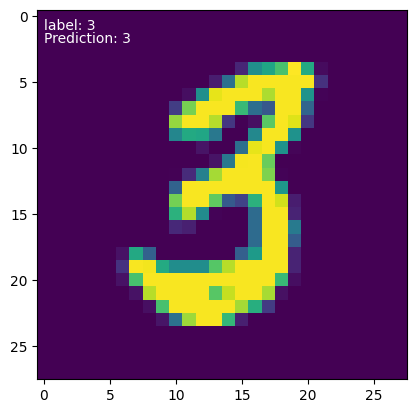

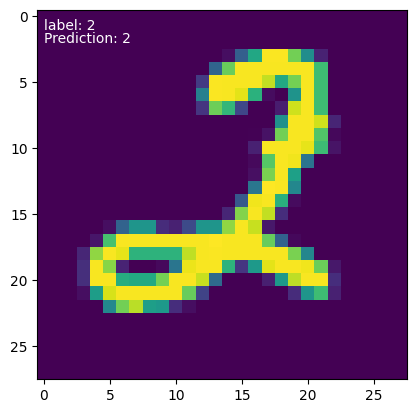

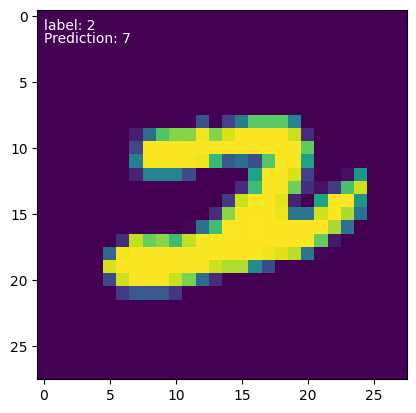

In [48]:
tam_output = 0
for datas in test_dataset.create_dict_iterator():
    predictions = model(datas['image'])
    for image, label, pred in zip(datas['image'], datas['label'], predictions):
        image = image.asnumpy()[0]
        plt.imshow(image)
        plt.text(0,1,f'label: {label}', c='white')
        plt.text(0,2,f'Prediction: {np.argmax(pred)}', c='white')
        plt.show()
        tam_output += 1
        if tam_output >= 3:
            break
    if tam_output >= 3:
        break   